In [1]:
from octis.dataset.dataset import Dataset
import hdbscan
import sys
sys.path.append('C:\\Users\\Martin\\Documents\\GitHub\\master\\evaluation')
import trainer
import helper
import pandas as pd

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
import multimodal
import c_tf_idf
import multimodalModel

In [4]:
output_folder = './results/experiment_2'
dataset_folder = './multimodal_custom_octis_dataset/'

In [5]:
mm_dataset = Dataset()
mm_dataset.load_custom_dataset_from_folder(dataset_folder)

In [6]:
embedding_model = SentenceTransformer("clip-ViT-B-32")

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [7]:

path_to_data = './multimodal_data.tsv'

try:
    texts, images = multimodal.get_image_and_text_from_file(path_to_data)
except FileNotFoundError:
    base_path = '..\\data\\processed'
    ends = ['processed_part-00000-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00001-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00002-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00003-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00004-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,]
    paths = [f'{base_path}\\{end}' for end in ends]
    df = helper.load_all_data(paths)
    df.to_csv(path_to_data, index=False, sep='\t')
    texts, images = helper.get_image_and_text_from_df(df)


In [8]:
text_embed = multimodal.get_embeddings_from_text(texts, embedding_model)
image_embed = multimodal.get_embeddings_from_images(images, embedding_model)

 37%|███▋      | 34/91 [00:31<00:48,  1.17it/s]c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 91/91 [01:20<00:00,  1.13it/s]


In [9]:
metricsloader = trainer.MetricsLoader(dataset_folder)

In [14]:
params = {'path_to_data':path_to_data,
'embedding_model':SentenceTransformer("clip-ViT-B-32"),

'precomputed_text_embeds':text_embed,
'precomputed_image_embeds':image_embed
}
base_name = 'experiment_2_im_and_tm'

min_cluster_size = 200
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
params['clusterer']=clusterer

get_extra_info = True
fitted_clusterers = []
image_representatives = []
top_terms_representatives = []
single_modalities = [text_embed, image_embed]
for modality in single_modalities:
   
    params['combined_embed']=modality
    mm_trainer = trainer.Trainer(custom_dataset_folder=dataset_folder, params=params, metrics_loader=metricsloader)
    helper.run_experiment(mm_trainer, output_folder, name=f'{base_name}unrestricted_topics_min_cluster_size_{min_cluster_size}', num_times=10)
    if get_extra_info:
        last_fit_clusterer = mm_trainer.model.clusterer
        fitted_clusterers.append(last_fit_clusterer)

        mm_trainer.model.find_image_representatives()
        last_fit_images = mm_trainer.model.cluster_images
        last_fit_terms = mm_trainer.model.top_terms

        image_representatives.append(last_fit_images)
        top_terms_representatives.append(last_fit_terms)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


start:23032023_10_57_49


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 221352.99it/s]


npmi:-0.04973163756206944
diversity:0.86
wetc:0.6806493551077442


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 236301.88it/s]


npmi:0.03655699050371099
diversity:0.8285714285714286
wetc:0.7343037940607849


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 239827.33it/s]


npmi:0.029364581517021253
diversity:0.85
wetc:0.6699206208413113


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 227538.40it/s]


npmi:0.005893087000761268
diversity:0.8
wetc:0.6784649201645954


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 237474.89it/s]


npmi:-0.010106416045345868
diversity:0.8555555555555555
wetc:0.7259807693876069


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 236284.19it/s]


npmi:0.009172231422869275
diversity:0.8333333333333334
wetc:0.7355007153715118


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 236887.34it/s]


npmi:0.030936393953292004
diversity:0.8571428571428571
wetc:0.7212644534070964


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 237483.41it/s]


npmi:0.022587812489120937
diversity:0.8222222222222222
wetc:0.7470440953523069


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 238630.74it/s]


npmi:0.007821013211770114
diversity:0.7818181818181819
wetc:0.6760443818549123


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 238596.06it/s]


npmi:0.00638466355293341
diversity:0.875
wetc:0.7108730880956421
end:23032023_10_57_49
start:23032023_12_10_48


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 216463.22it/s]


npmi:-0.08052047826242952
diversity:0.8285714285714286
wetc:0.6736773667039121


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 220358.81it/s]


npmi:-0.07067693313449135
diversity:0.8142857142857143
wetc:0.6724354757456966


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 231853.33it/s]


npmi:-0.06498868626794488
diversity:0.7857142857142857
wetc:0.6736012099962342


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 236324.74it/s]


npmi:-0.08323707024805983
diversity:0.7857142857142857
wetc:0.679291345628268


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 235188.64it/s]


npmi:-0.11363665466616651
diversity:0.8333333333333334
wetc:0.6669761243379705


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 212692.39it/s]


npmi:-0.04104190140329369
diversity:0.84
wetc:0.6820328225665993


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 168390.25it/s]


npmi:-0.03011997547502963
diversity:0.85
wetc:0.6603326236485153


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 150519.65it/s]


npmi:-0.06735471980596845
diversity:0.8285714285714286
wetc:0.6745210333653945


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 169857.01it/s]


npmi:-0.06783182776028665
diversity:0.8
wetc:0.7004709848889501


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 175337.34it/s]


npmi:-0.09592464940571604
diversity:0.8166666666666667
wetc:0.6992987955891755
end:23032023_12_10_48


In [15]:
#for fc in fitted_clusterers:
#    fc.condensed_tree_.plot(select_clusters=True)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



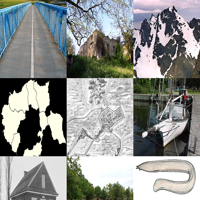
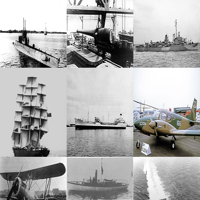
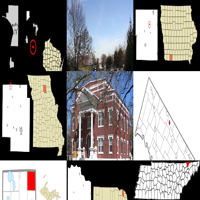
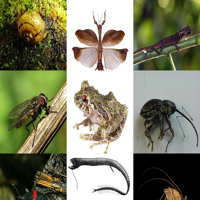
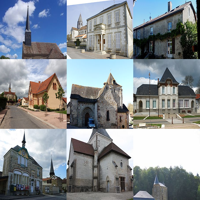
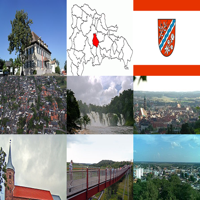
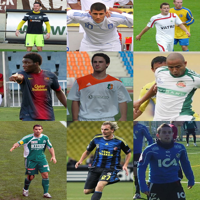
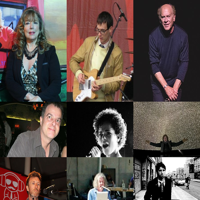


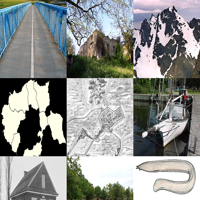
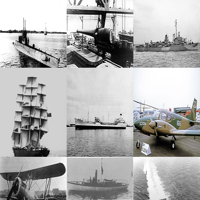
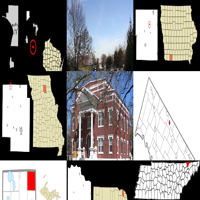
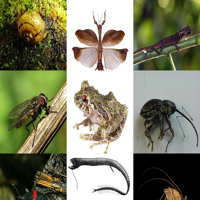
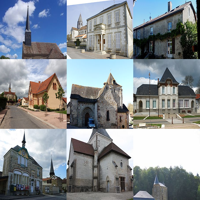
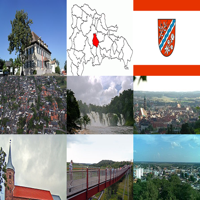
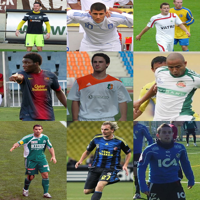
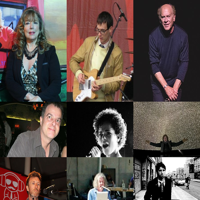


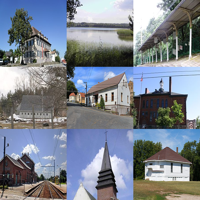
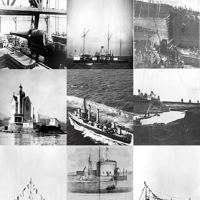
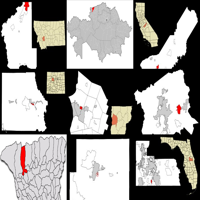
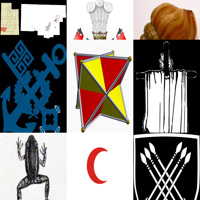
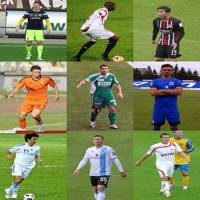
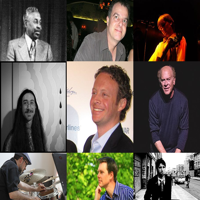


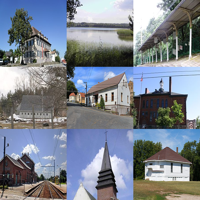
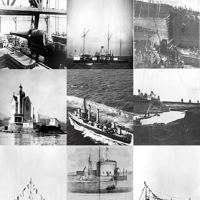
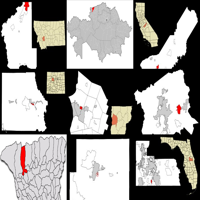
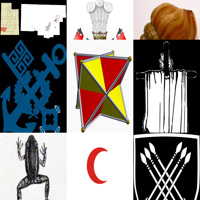
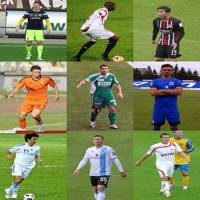
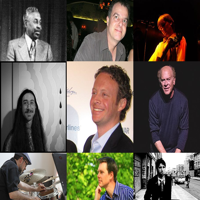

In [16]:
import ipyplot
for nr in range(len(image_representatives)):
    ipyplot.plot_images([*image_representatives[nr].values()],custom_texts=top_terms_representatives[nr], max_images=20, img_width=150)
        